In [111]:
import data.imgs as img_data
import os.path as osp
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal # https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/
import csv
import data

In [112]:
# 1. Averages of AGBM pixel values
# 2. Average distribution of AGBM pixel values
# 3. Distribution of lowest average AGBM image, and highest

In [113]:
train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")
train_label_path = osp.join(osp.dirname(img_data.__file__), "train_agbm")

In [114]:
with open(osp.join(osp.dirname(data.__file__), 'patch_names'), newline='') as f:
    reader = csv.reader(f)
    patch_name_data = list(reader)
patch_names = patch_name_data[0]

In [115]:
def flatten_agbm_from_path(path):
    img_path = osp.join(train_label_path, path)
    dataset = gdal.Open(img_path)
    data = dataset.ReadAsArray()
    return data

In [116]:
tifs = [patch_names[x] + "_agbm.tif" for x in range(10,8000)]
data_points = [flatten_agbm_from_path(x) for x in tifs]

In [117]:
# 1. Averages of AGBM pixel values
sum = np.zeros(shape=(256, 256))
average_pixel = np.average(data_points)
print("Average of all pixel values: ", average_pixel)

Average of all pixel values:  63.397125


In [118]:
# 2. Average distribution of AGBM pixel values
all_sorted = []
for p in data_points:
    flattened = p.flatten()
    sorted_vals = sorted(flattened)
    all_sorted.append(sorted_vals)
all_sorted_average = np.average(all_sorted, axis=0)

Text(38000, 550, 'This indicates noise spikes')

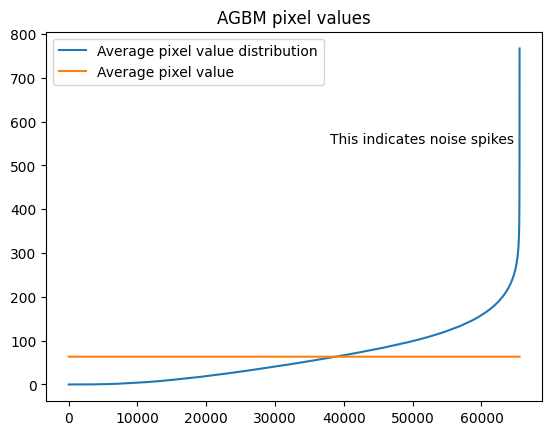

In [119]:
plt.title("AGBM pixel values")
plt.plot(all_sorted_average, label="Average pixel value distribution")
plt.plot([average_pixel] * (256 * 256), label="Average pixel value")
plt.legend(loc="upper left")
plt.text(x=38000, y=550, s="This indicates noise spikes")

In [120]:
# 3. Distribution of lowest average AGBM image, and highest
all_sorted_average_per_image = [np.average(x) for x in all_sorted]
min_index = all_sorted_average_per_image.index(min(all_sorted_average_per_image))
max_index = all_sorted_average_per_image.index(max(all_sorted_average_per_image))

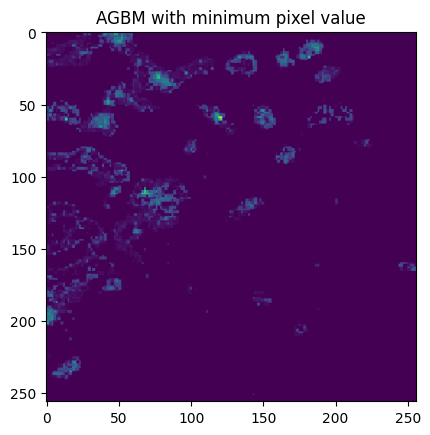

In [121]:
from matplotlib.pyplot import imshow
from PIL import Image

im = Image.open(osp.join(train_label_path, tifs[min_index]))
plt.title("AGBM with minimum pixel value")
imshow(np.asarray(im))

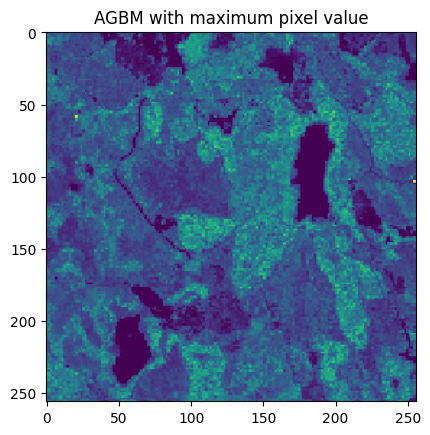

In [122]:
im = Image.open(osp.join(train_label_path, tifs[max_index]))
plt.title("AGBM with maximum pixel value")
imshow(np.asarray(im))